# Scatterplots (ggplot2)
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to make a scatterplot.

## Solution
Suppose this is your data:

In [1]:
set.seed(955)
# Make some noisily increasing data
dat <- data.frame(cond = rep(c("A", "B"), each=10),
                  xvar = 1:20 + rnorm(20,sd=3),
                  yvar = 1:20 + rnorm(20,sd=3))
head(dat)

,cond,xvar,yvar
1,A,-4.252354,3.473157
2,A,1.702318,0.005939612
3,A,4.323054,-0.09425243
4,A,1.780628,2.072808
5,A,11.53735,1.21544
6,A,6.67213,3.608111


In [2]:
#use the ggplot2 libary for plotting in this notebook
library(ggplot2)

### Basic scatterplots with regression lines

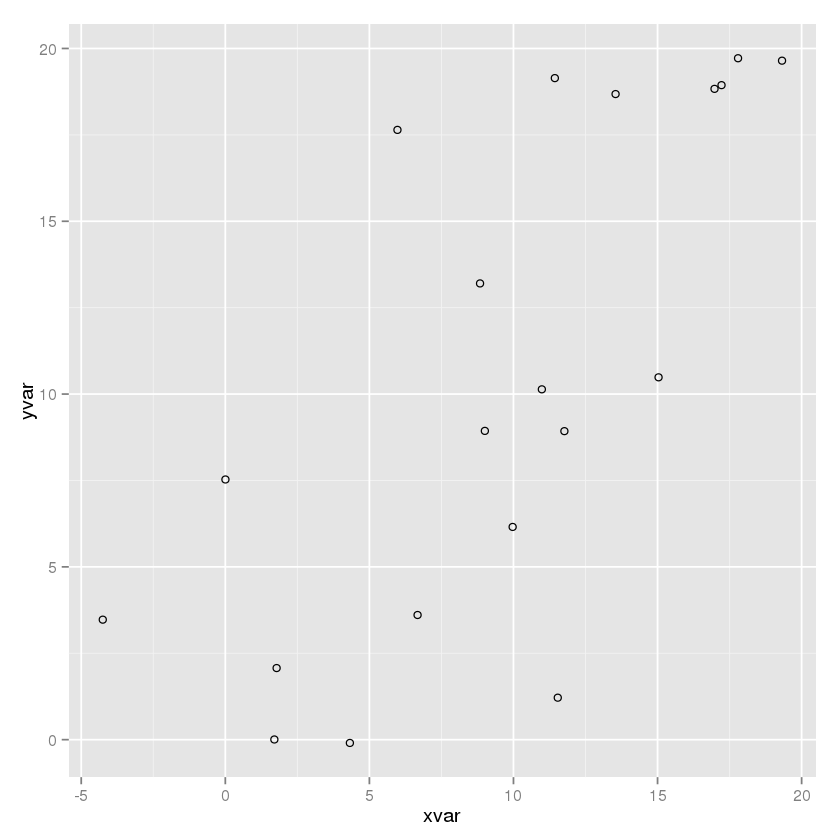

In [3]:
ggplot(dat, aes(x=xvar, y=yvar)) +
    geom_point(shape=1)      # Use hollow circles

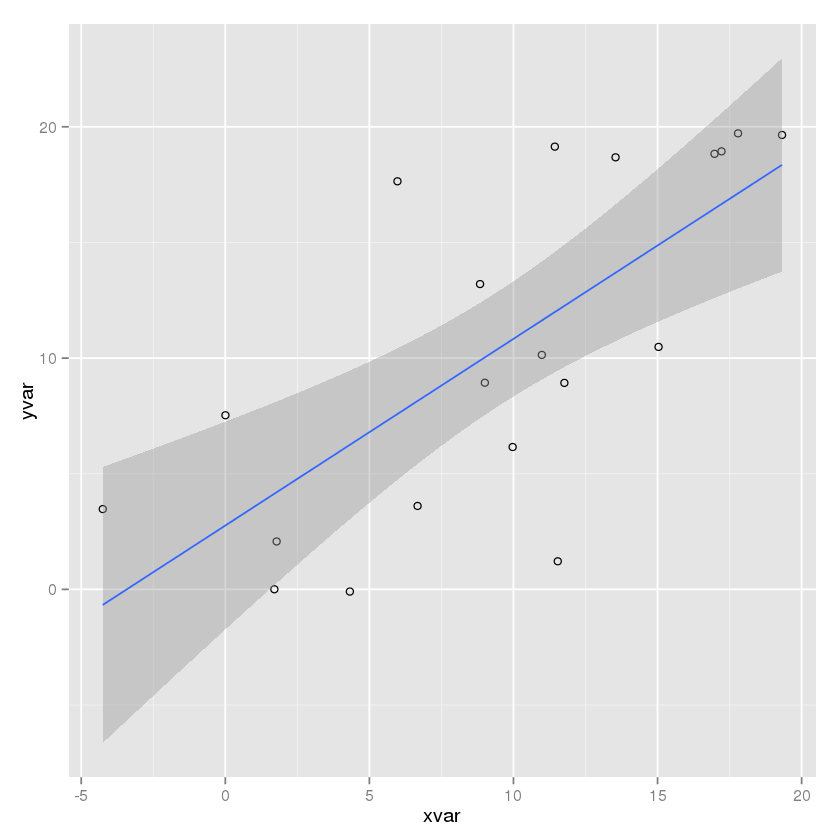

In [4]:
ggplot(dat, aes(x=xvar, y=yvar)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth(method=lm)   # Add linear regression line 
                             #  (by default includes 95% confidence region)

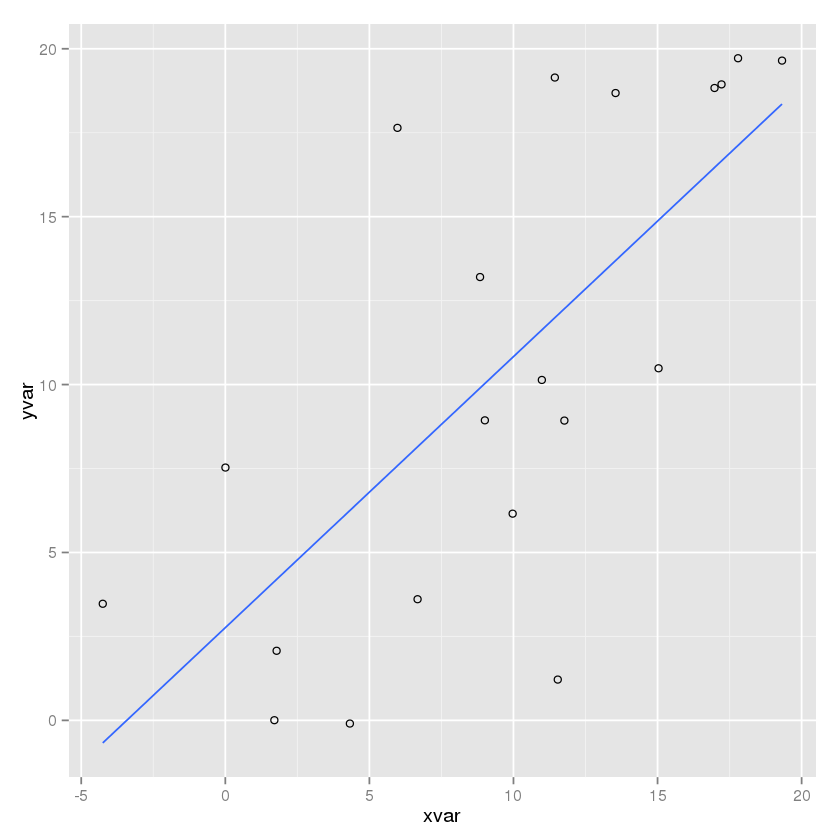

In [5]:
ggplot(dat, aes(x=xvar, y=yvar)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth(method=lm,   # Add linear regression line
                se=FALSE)    # Don't add shaded confidence region

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


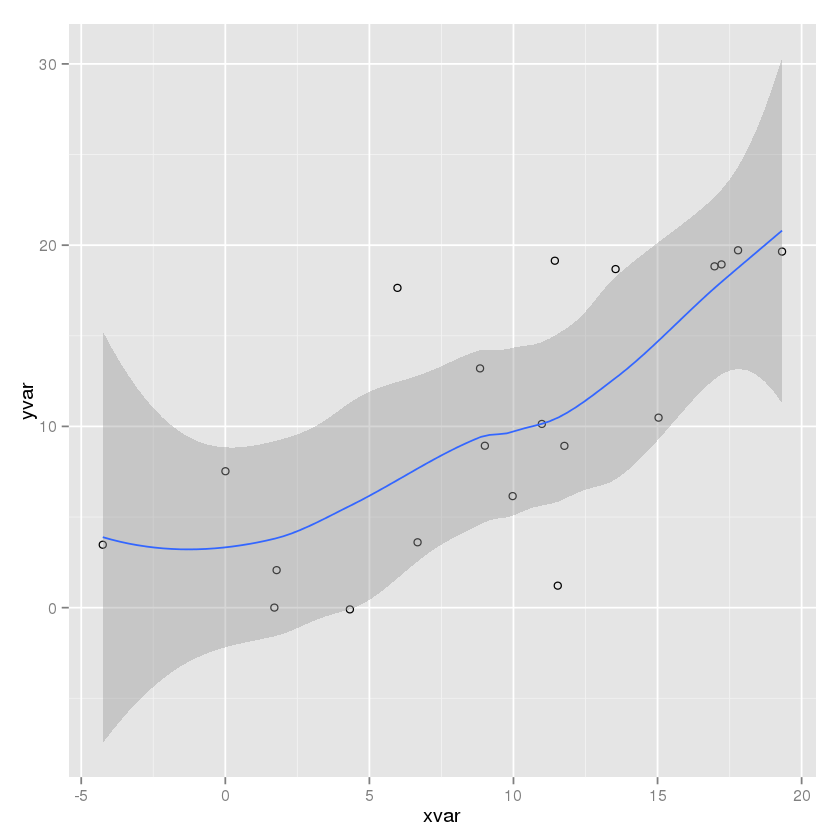

In [6]:
ggplot(dat, aes(x=xvar, y=yvar)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth()            # Add a loess smoothed fit curve with confidence region
#geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.

### Set color/shape by another variable

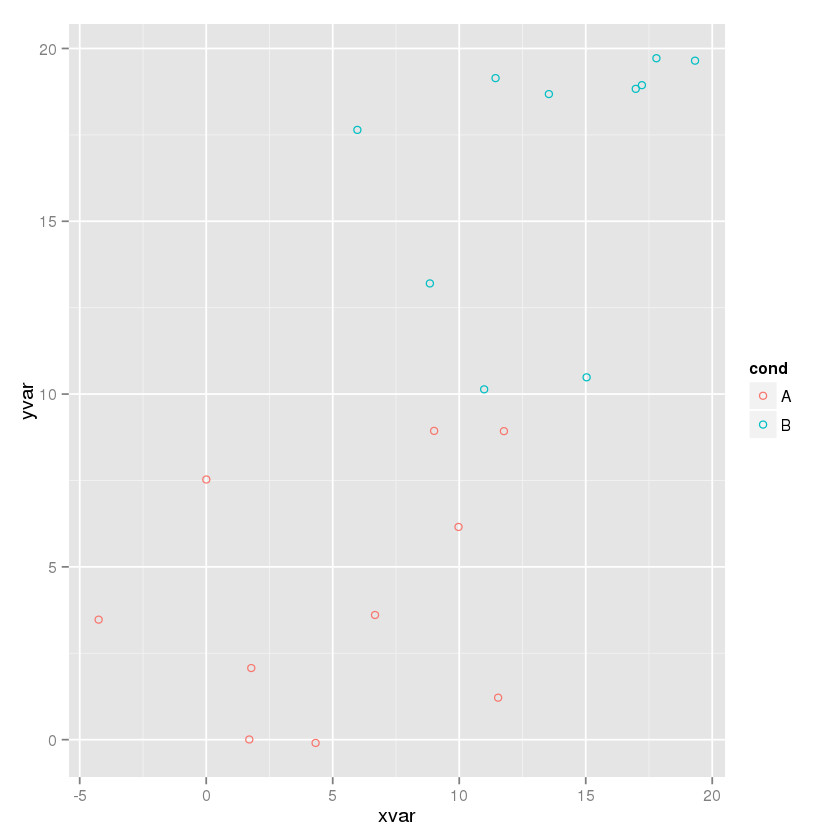

In [7]:
# Set color by cond
ggplot(dat, aes(x=xvar, y=yvar, color=cond)) + geom_point(shape=1)

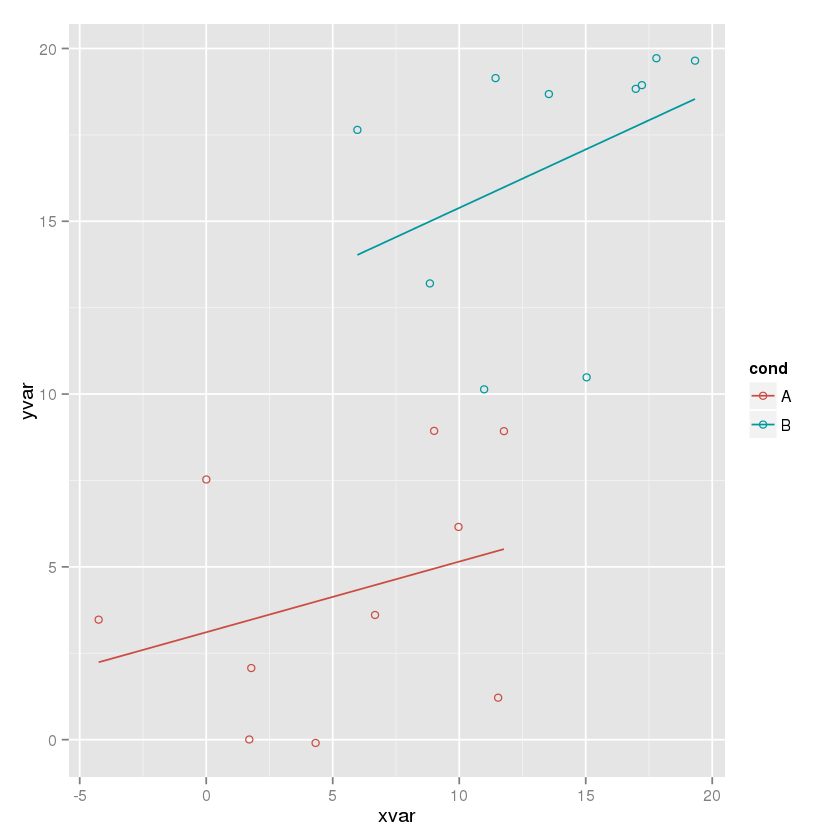

In [8]:
# Same, but with different colors and add regression lines
ggplot(dat, aes(x=xvar, y=yvar, color=cond)) +
    geom_point(shape=1) +
    scale_colour_hue(l=50) + # Use a slightly darker palette than normal
    geom_smooth(method=lm,   # Add linear regression lines
                se=FALSE)    # Don't add shaded confidence region

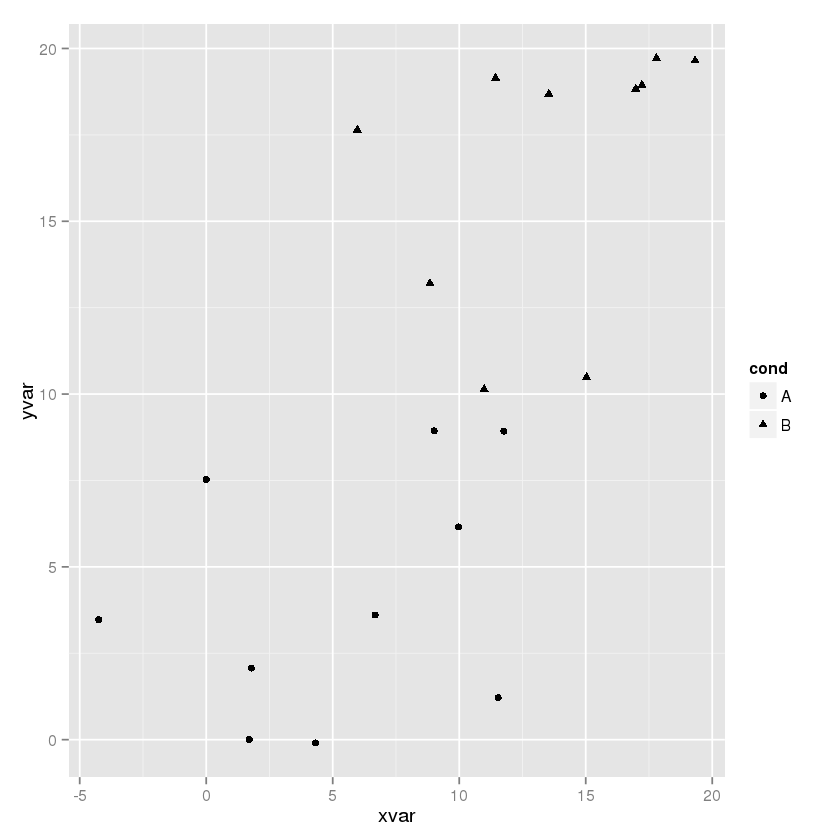

In [9]:
# Set shape by cond
ggplot(dat, aes(x=xvar, y=yvar, shape=cond)) + geom_point()

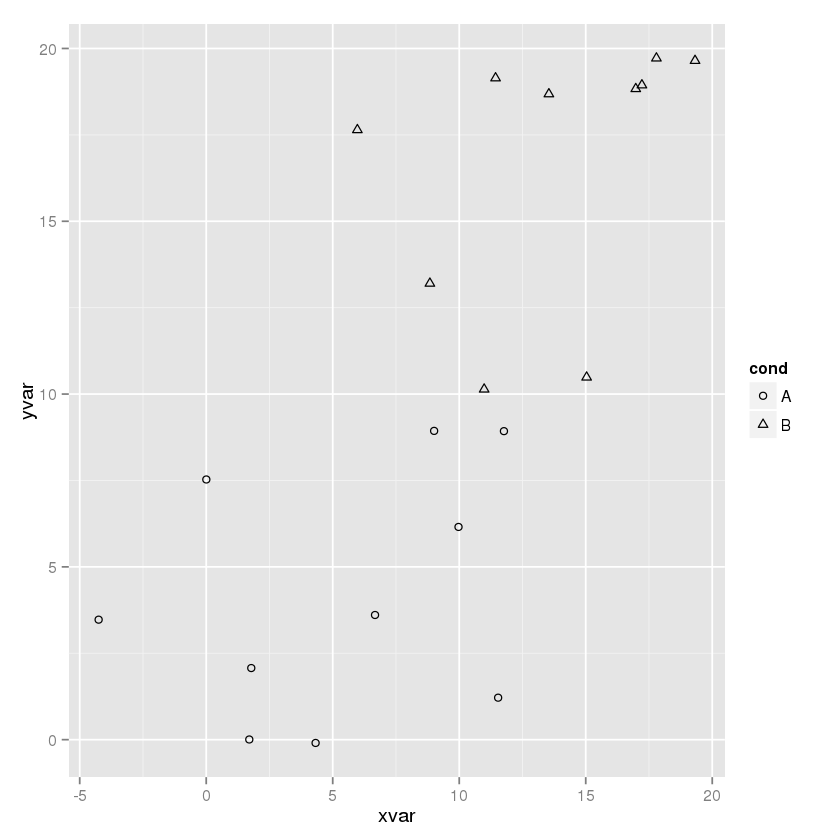

In [10]:
# Same, but with different shapes
ggplot(dat, aes(x=xvar, y=yvar, shape=cond)) + geom_point() +
    scale_shape_manual(values=c(1,2))  # Use a hollow circle and triangle

### Handling overplotting
If you have many data points, or if your data scales are discrete, then the data points might overlap and it will be impossible to see if there are many points at the same location.

In [11]:
# Round xvar and yvar to the nearest 5
dat$xrnd <- round(dat$xvar/5)*5
dat$yrnd <- round(dat$yvar/5)*5

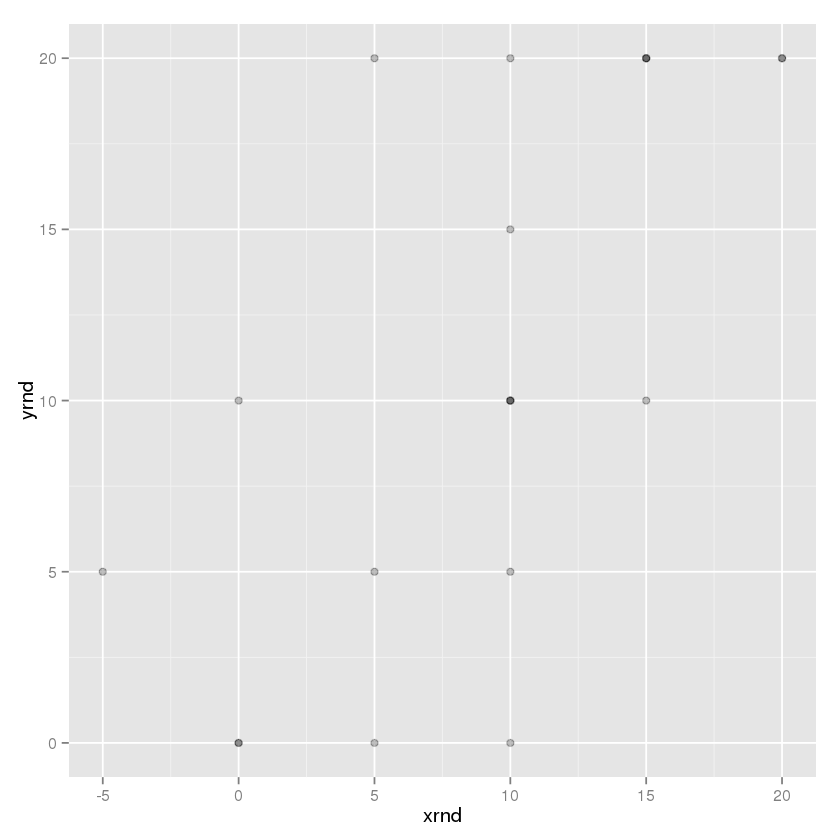

In [12]:
# Make each dot partially transparent, with 1/4 opacity
# For heavy overplotting, try using smaller values
ggplot(dat, aes(x=xrnd, y=yrnd)) +
    geom_point(shape=19,      # Use solid circles
               alpha=1/4)     # 1/4 opacity

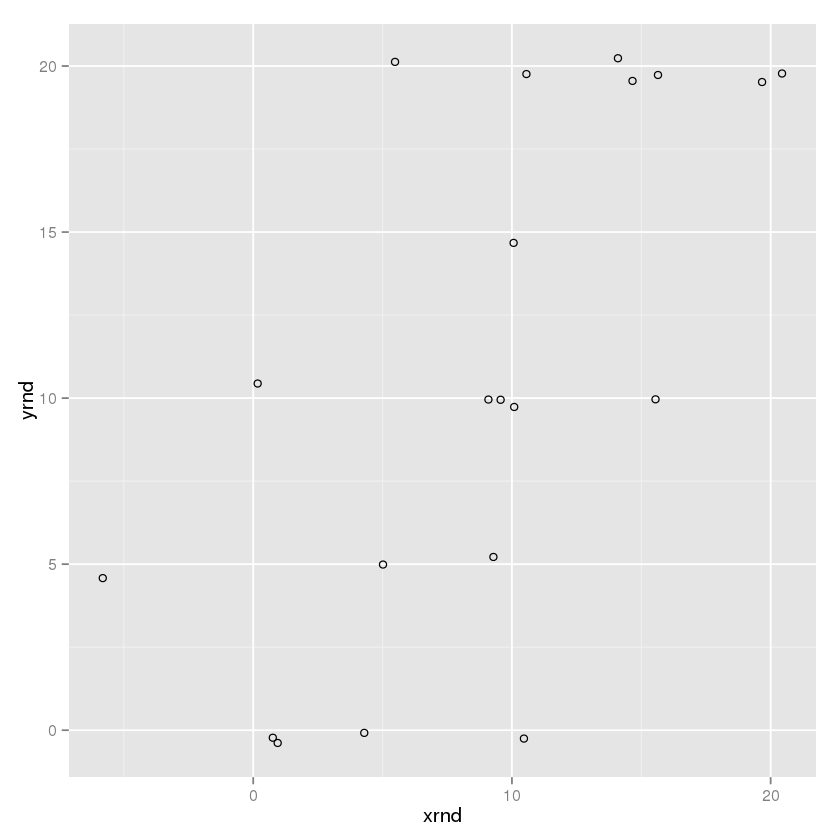

In [13]:
# Jitter the points
# Jitter range is 1 on the x-axis, .5 on the y-axis
ggplot(dat, aes(x=xrnd, y=yrnd)) +
    geom_point(shape=1,      # Use hollow circles
               position=position_jitter(width=1,height=.5))